<a href="https://colab.research.google.com/github/Mukundm98/Mukundm98/blob/main/RFM_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem statement:
 Use the transactions data set at the link below contains all the transactions occurring between dd/mm/yyyy and dd/mm/yyyy for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.
#### https://archive.ics.uci.edu/ml/datasets/Online+Retail


### RFM-Analysis

#### What is RFM Analysis?

RFM(recency, frequency, monetary) analysis is a marketing technique used to determine quantitatively which customers are the best ones by examining how recently a customer has purchased (recency), how often they purchase (frequency), and how much the customer spends (monetary).



#### Load the required libraries and read data from Online retail excel file

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sn
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 # loading the dadasets available 
 !ls "/content/drive/MyDrive/RFM/"
 filepath = "/content/drive/MyDrive/RFM/"

'Online Retail.xlsx'  'RFM analysis.ipynb'


In [ ]:
Retail_df = pd.read_excel(filepath + 'Online Retail.xlsx')

In [ ]:
Retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
Retail_df.shape

(541909, 8)

In [ ]:
Retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
Retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### Convert the series invoice date data in datetime format and count the unique number of attributes

In [ ]:
#Convert the date in YYYY-mm-dd HH:MM format and store that date in 'Date' column
Retail_df['Date']=pd.to_datetime(Retail_df['InvoiceDate'], format = '%Y-%m-%d %H:%M:%S')

# Count the unique no of attributes in Retail data
def unique_counts(Retail_df):
   for i in Retail_df.columns:
       count = Retail_df[i].nunique()
       print(i, ": ", count)
unique_counts(Retail_df)


InvoiceNo :  25900
StockCode :  4070
Description :  4223
Quantity :  722
InvoiceDate :  23260
UnitPrice :  1630
CustomerID :  4372
Country :  38
Date :  23260


#### Calculate Total Price by multiplying units and quantity and store that value in separate column Total_Price

In [ ]:

Retail_df['Total_Price']=Retail_df['Quantity']*Retail_df['UnitPrice']
Retail_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34


In [ ]:
print(Retail_df.isna().sum()/541909*100)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
Date            0.000000
Total_Price     0.000000
dtype: float64


#### Only consider rows without NaN values and store the data in dataset Online_retail_df

In [ ]:

Online_retail_df = Retail_df[np.isfinite(Retail_df['CustomerID'])]


NameError: ignored

In [ ]:
Online_retail_df.info()

In [ ]:
Online_retail_df.shape


#### Count the unique no of attributes in Retail data

In [ ]:

unique_counts(Online_retail_df)

InvoiceNo :  22190
StockCode :  3684
Description :  3896
Quantity :  436
InvoiceDate :  20460
UnitPrice :  620
CustomerID :  4372
Country :  37
Date :  20460
Total_Price :  4041


In [ ]:
# As we observed from Retail_df.describe() that quantity data in negative we need to take care of it.
a = Online_retail_df["Quantity"] >=0
a.value_counts()

True     397924
False      8905
Name: Quantity, dtype: int64

In [ ]:
#For calculating recency and frequency, drop the rows with negative values of Quantity and store the data in final_df
final_retail = Online_retail_df[Online_retail_df['Quantity'] > 0]

In [ ]:
final_retail.shape

(397924, 10)

In [ ]:
unique_counts(final_retail)

InvoiceNo :  18536
StockCode :  3665
Description :  3877
Quantity :  302
InvoiceDate :  17286
UnitPrice :  441
CustomerID :  4339
Country :  37
Date :  17286
Total_Price :  2940


In [ ]:
final_retail['Date'].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
final_retail['Date'].min()

Timestamp('2010-12-01 08:26:00')

### Calculate RFM value of each customer


In [ ]:
#Calculate recency and frequency
import datetime as dt
NOW = dt.datetime(2011,12,10)


In [ ]:
rfmTable = final_retail.groupby('CustomerID').agg({'Date': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x),'Total_Price': lambda x: x.sum()})
rfmTable['Date'] = rfmTable['Date'].astype(int)
rfmTable.rename(columns={'Date': 'recency', 
                         'InvoiceNo': 'frequency',
                       'Total_Price': 'monetary_value'}, inplace=True)

In [ ]:
#rfmTable = pd.merge(mTable, rfTable, on="CustomerID",how = 'inner')
rfmTable.shape


(4339, 3)

In [ ]:
rfmTable.head(10)

,recency,frequency,monetary_value
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
12352.0,36,85,2506.04
12353.0,204,4,89.00
12354.0,232,58,1079.40
12355.0,214,13,459.40


#### Below are top 25 customers after sorting
Sorted first on frequency values and then monetory_value

In [ ]:
rfmTable.sort_values(['frequency', 'monetary_value'], ascending=[False, False], inplace=True)

In [ ]:

rfmTable.head(25)


,recency,frequency,monetary_value
CustomerID,,,
17841.0,1,7847,40991.57
14911.0,1,5677,143825.06
14096.0,4,5111,65164.79
12748.0,0,4596,33719.73
14606.0,1,2700,12156.65
15311.0,0,2379,60767.90
14646.0,1,2080,280206.02
13089.0,2,1818,58825.83
13263.0,1,1677,7454.07


### Normalising the features

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( rfmTable )

In [ ]:
import plotly.figure_factory as ff
import numpy as np

X = np.random.rand(15, 10) # 15 samples, with 10 dimensions each
fig = ff.create_dendrogram(X, color_threshold=1.5)
fig.update_layout(width=800, height=500)
fig.show()

In [ ]:
import plotly.figure_factory as ff
import numpy as np
np.random.seed(1)

X = np.random.rand(15, 12) # 15 samples, with 12 dimensions each
fig = ff.create_dendrogram(X)
fig.update_layout(width=800, height=500)
fig.show()

In [ ]:
clusters = KMeans(6)  # 6 clusters
clusters.fit( X_scaled )

KMeans(n_clusters=6)

In [ ]:
clusters.labels_

array([1, 1, 1, ..., 2, 2, 0], dtype=int32)

In [ ]:
rfmTable["cluster_label"] = clusters.labels_

In [ ]:
rfmTable.head(5)

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
17841.0,1,7847,40991.57,1
14911.0,1,5677,143825.06,1
14096.0,4,5111,65164.79,1
12748.0,0,4596,33719.73,1
14606.0,1,2700,12156.65,4


In [ ]:
# Elbow curve
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

In [ ]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [ ]:

clusters_df.head(10)

,num_clusters,cluster_errors
0,1,13017.000000
1,2,8996.762762
2,3,5453.122485
3,4,4000.669315
4,5,2958.445965
5,6,2371.441752
6,7,1923.160087
7,8,1674.501637
8,9,1499.180571


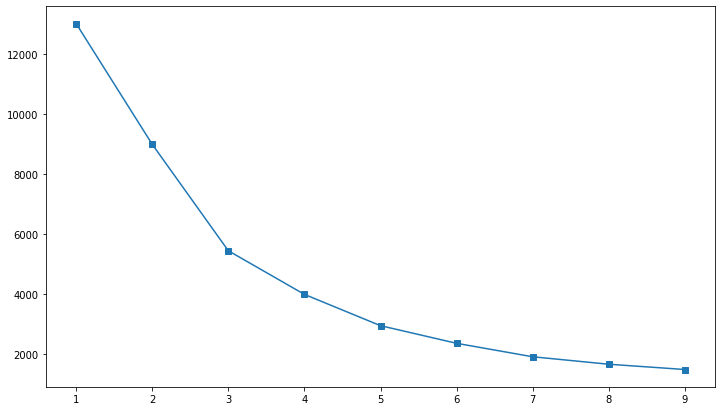

In [ ]:
import matplotlib.pyplot as plt
_=plt.figure(figsize=(12,7))
_=plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "s" )

In [ ]:
rfmTable.groupby('cluster_label').mean()

,recency,frequency,monetary_value
cluster_label,,,
0,44.884351,65.248113,1234.749174
1,1.500000,5807.750000,70925.287500
2,249.167932,27.782732,532.079081
3,31.142857,799.500000,72440.595714
4,15.762178,404.679083,7311.694441
5,2.250000,712.750000,225721.652500


### Creating seperate RFM table for each clusters

In [ ]:
rfmTable_0 = rfmTable[rfmTable.cluster_label == 0]

In [ ]:
rfmTable_0.head(5)

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
14472.0,103,281,1936.84,0
15834.0,70,273,2233.75,0
16728.0,46,269,1054.67,0
17126.0,152,260,1004.75,0
14449.0,18,258,907.10,0


In [ ]:
rfmTable_1 = rfmTable[rfmTable.cluster_label == 1]
rfmTable_1.head(5)

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
17841.0,1,7847,40991.57,1
14911.0,1,5677,143825.06,1
14096.0,4,5111,65164.79,1
12748.0,0,4596,33719.73,1


In [ ]:
rfmTable_2 = rfmTable[rfmTable.cluster_label == 2]
rfmTable_2.head(5)

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
17850.0,372,297,5391.21,2
15644.0,166,238,813.00,2
14573.0,179,235,1653.42,2
15808.0,306,208,3734.97,2
15379.0,169,194,3703.29,2


In [ ]:
rfmTable_3 = rfmTable[rfmTable.cluster_label == 3]
rfmTable_3.head(10)

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
15311.0,0,2379,60767.90,3
13089.0,2,1818,58825.83,3
14298.0,8,1637,51527.30,3
14156.0,9,1400,117379.63,3
17511.0,2,963,91062.38,3
12415.0,24,716,124914.53,3
14088.0,10,589,50491.81,3
13694.0,3,568,65039.62,3
15061.0,3,403,54534.14,3


In [ ]:
rfmTable_4 = rfmTable[rfmTable.cluster_label == 4]
rfmTable_4.head(10)

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
14606.0,1,2700,12156.65,4
13263.0,1,1677,7454.07,4
15039.0,9,1502,19914.44,4
18118.0,10,1279,5653.82,4
14159.0,19,1204,4693.01,4
14796.0,1,1141,8022.49,4
16033.0,5,1137,8816.40,4
15005.0,15,1119,6316.57,4
14056.0,1,1106,8214.65,4


In [ ]:
rfmTable_5 = rfmTable[rfmTable.cluster_label == 5]
rfmTable_5.head(5)

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
14646.0,1,2080,280206.02,5
18102.0,0,431,259657.30,5
17450.0,8,337,194550.79,5
16446.0,0,3,168472.50,5


In [ ]:
rfmTable_0.mean()

recency             44.884351
frequency           65.248113
monetary_value    1234.749174
cluster_label        0.000000
dtype: float64

In [ ]:
rfmTable_1.mean()

recency               1.5000
frequency          5807.7500
monetary_value    70925.2875
cluster_label         1.0000
dtype: float64

In [ ]:
rfmTable_2.mean()

recency           249.167932
frequency          27.782732
monetary_value    532.079081
cluster_label       2.000000
dtype: float64

In [ ]:
rfmTable_3.mean()

recency              31.142857
frequency           799.500000
monetary_value    72440.595714
cluster_label         3.000000
dtype: float64

In [ ]:
rfmTable_4.mean()

recency             15.762178
frequency          404.679083
monetary_value    7311.694441
cluster_label        4.000000
dtype: float64

In [ ]:
rfmTable_5.mean()

recency                2.2500
frequency            712.7500
monetary_value    225721.6525
cluster_label          5.0000
dtype: float64

In [ ]:
RFM = rfmTable.groupby('cluster_label').mean()

In [ ]:
RFM

,recency,frequency,monetary_value
cluster_label,,,
0,44.884351,65.248113,1234.749174
1,1.500000,5807.750000,70925.287500
2,249.167932,27.782732,532.079081
3,31.142857,799.500000,72440.595714
4,15.762178,404.679083,7311.694441
5,2.250000,712.750000,225721.652500


In [ ]:
RFM.sort_values(['frequency', 'monetary_value'], ascending = [False , False], inplace = True)

In [ ]:
RFM

,recency,frequency,monetary_value
cluster_label,,,
1,1.500000,5807.750000,70925.287500
3,31.142857,799.500000,72440.595714
5,2.250000,712.750000,225721.652500
4,15.762178,404.679083,7311.694441
0,44.884351,65.248113,1234.749174
2,249.167932,27.782732,532.079081


In [ ]:
# ! pip install tabulate

In [ ]:
print(RFM.to_markdown())

|   cluster_label |   recency |   frequency |   monetary_value |
|----------------:|----------:|------------:|-----------------:|
|               1 |    1.5    |   5807.75   |        70925.3   |
|               3 |   31.1429 |    799.5    |        72440.6   |
|               5 |    2.25   |    712.75   |       225722     |
|               4 |   15.7622 |    404.679  |         7311.69  |
|               0 |   44.8844 |     65.2481 |         1234.75  |
|               2 |  249.168  |     27.7827 |          532.079 |


### Our final RFM table which we used to to RFM analysis 
|   cluster_label |   recency |   frequency |   monetary_value |
|----------------:|----------:|------------:|-----------------:|
|               4 |    1.5    |   5807.75   |        70925.3   |
|               3 |    2.25   |    712.75   |       225722     |
|               2 |   43.25   |    705.312  |        68797.4   |
|               5 |   15.6647 |    411.852  |         7259.8   |
|               1 |   44.715  |     65.8368 |         1252.17  |
|               0 |  248.986  |     27.7934 |          490.447 |

